# Problem Statement:
Pick up the following stocks and generate forecasts accordingly
Stocks:
1. NASDAQ.AAPL
2. NASDAQ.ADP
3. NASDAQ.CBOE
4. NASDAQ.CSCO
5. NASDAQ.EBAY

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA, ARMAResults
import datetime
import sys
import seaborn as sns
import statsmodels
import statsmodels.stats.diagnostic as diag
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from scipy.stats.mstats import normaltest
from matplotlib.pyplot import acorr
from sklearn.metrics import mean_squared_error
plt.style.use('fivethirtyeight')
%matplotlib inline
data = pd.read_csv('C:/Users/shrqfrhn/Downloads/data_stocks.csv')
data.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [2]:
data.describe()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
count,4.126600e+04,41266.000000,41266.000000,41266.000000,41266.00000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,...,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000
mean,1.497749e+09,2421.537882,47.708346,150.453566,141.31793,79.446873,103.480398,102.998608,50.894352,122.981163,...,97.942211,104.740666,46.664402,43.043984,80.784595,19.300718,54.541988,71.757891,121.423515,60.183874
std,3.822211e+06,39.557135,3.259377,6.236826,6.91674,2.000283,4.424244,9.389788,4.833931,11.252010,...,5.411795,10.606694,1.508444,1.714533,1.840989,11.686532,3.526321,4.038272,5.607070,3.346887
min,1.491226e+09,2329.139900,40.830000,140.160000,128.24000,74.800000,95.870000,83.000000,44.650000,96.250000,...,83.410000,89.510000,44.090000,39.120000,76.060000,6.660000,48.820000,63.180000,110.120000,52.300000
25%,1.494432e+09,2390.860100,44.945400,144.640000,135.19500,78.030000,101.300000,94.820000,47.440000,116.950000,...,95.960000,95.010000,45.155000,41.955000,80.220000,7.045000,51.630000,69.110000,117.580000,59.620000
50%,1.497638e+09,2430.149900,48.360000,149.945000,142.26000,79.410000,102.440000,106.820000,49.509900,123.620000,...,99.250000,99.660000,46.810000,43.200000,81.150000,27.890000,53.850000,73.470000,120.650000,61.585600
75%,1.501090e+09,2448.820100,50.180000,155.065000,147.10000,80.580000,104.660000,110.490000,52.230000,132.218800,...,102.080000,117.034700,47.730000,44.370000,82.062050,30.470000,57.140000,74.750000,126.000000,62.540000
max,1.504210e+09,2490.649900,54.475000,164.510000,155.33000,90.440000,121.770000,119.270000,62.560000,142.875000,...,106.375000,123.870000,49.660000,47.210000,83.630000,32.930000,62.130000,77.120000,133.450000,63.840000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41266 entries, 0 to 41265
Columns: 502 entries, DATE to NYSE.ZTS
dtypes: float64(501), int64(1)
memory usage: 158.0 MB


In [4]:
data.isnull().values.any()

False

In [5]:
data['DATE'] = pd.to_datetime(data['DATE'], unit='ms')

In [6]:
data.head(5)

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1970-01-18 06:13:46.200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1970-01-18 06:13:46.260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1970-01-18 06:13:46.320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1970-01-18 06:13:46.380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1970-01-18 06:13:46.440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


# 3. NASDAQ.CBOE

In [7]:
df_CBOE = pd.DataFrame(data['NASDAQ.CBOE'])
df_CBOE.set_index(data['DATE'], inplace=True)
df_CBOE.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41266 entries, 1970-01-18 06:13:46.200000 to 1970-01-18 09:50:09.600000
Data columns (total 1 columns):
NASDAQ.CBOE    41266 non-null float64
dtypes: float64(1)
memory usage: 644.8 KB


In [8]:
df_CBOE.head(5)

,NASDAQ.CBOE
DATE,
1970-01-18 06:13:46.200,81.03
1970-01-18 06:13:46.260,81.21
1970-01-18 06:13:46.320,81.21
1970-01-18 06:13:46.380,81.13
1970-01-18 06:13:46.440,81.12


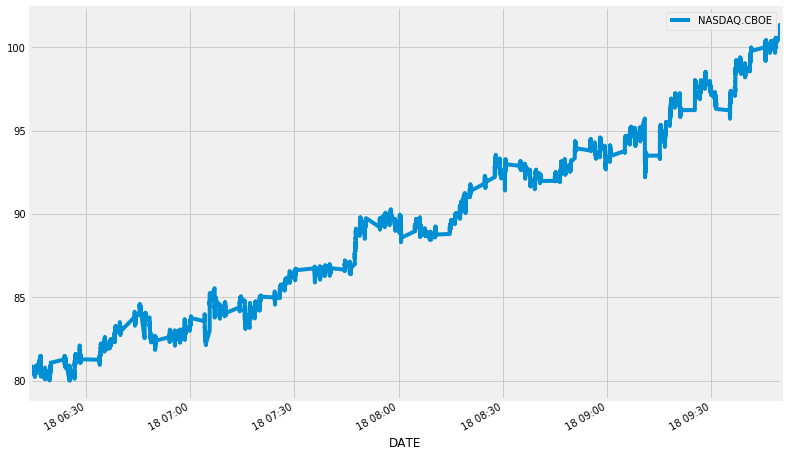

In [9]:
df_CBOE.plot(figsize=(12,8))

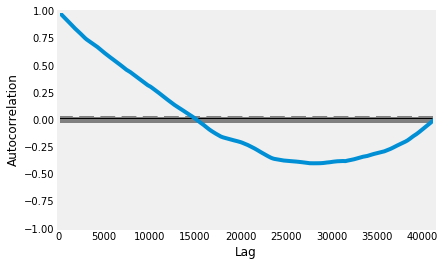

In [10]:
# Create an autocorrelation plot. 
autocorrelation_plot(df_CBOE)
plt.show()

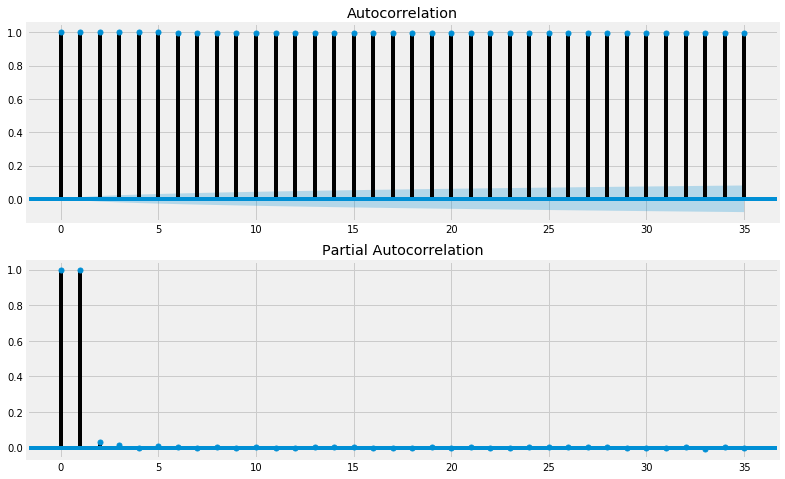

In [11]:
# Create ACF (Auto correlation) and PACF (partial Auto correlation) plots. 
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_CBOE.values.squeeze(), lags=35, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_CBOE, method='ywmle', lags=35, ax=ax2)

In [12]:
model = ARIMA(df_CBOE, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\shrqfrhn\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\shrqfrhn\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:          D.NASDAQ.CBOE   No. Observations:                41265
Model:                 ARIMA(5, 1, 0)   Log Likelihood               68168.215
Method:                       css-mle   S.D. of innovations              0.046
Date:                Thu, 21 Feb 2019   AIC                        -136322.431
Time:                        01:26:46   BIC                        -136262.036
Sample:                             1   HQIC                       -136303.342
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0005      0.000      2.532      0.011       0.000       0.001
ar.L1.D.NASDAQ.CBOE    -0.0810      0.005    -16.454      0.000      -0.091      -0.071
ar.L2.D.NASDAQ.C

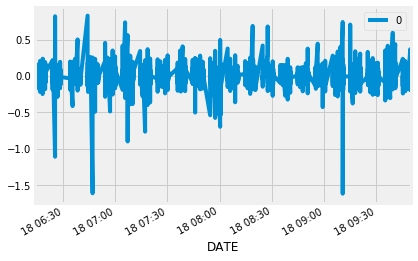

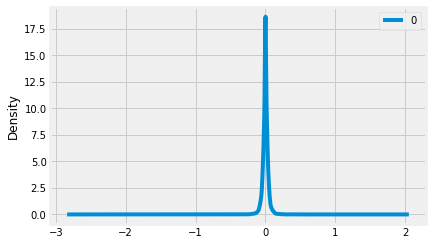

                  0
count  4.126500e+04
mean   7.209582e-07
std    4.638000e-02
min   -1.615220e+00
25%   -1.751802e-02
50%   -1.242665e-04
75%    1.804047e-02
max    8.291395e-01


In [13]:
# Plot the residuals of the model. 
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [14]:
# Test the model with train and test data 
size=int(len(df_CBOE)*0.7)
train, test = df_CBOE.values[0:size], df_CBOE.values[size:len(df_CBOE)]
len(train), len(test)

(28886, 12380)

In [15]:
# Create train list and empty list to store the predictions 
X=list(train)
predictions=[]
for t in range (len(test)):
    model = ARIMA(X, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    X.append(test[t])
    print('%d. predicted=%f, expected=%f' % (len(predictions), yhat, test[t]))

1. predicted=92.501620, expected=92.550000
2. predicted=92.546665, expected=92.610000
3. predicted=92.603749, expected=92.590000
4. predicted=92.588025, expected=92.620000
5. predicted=92.614821, expected=92.630000
6. predicted=92.626070, expected=92.630000
7. predicted=92.628125, expected=92.600000
8. predicted=92.601943, expected=92.600000
9. predicted=92.600795, expected=92.600000
10. predicted=92.601622, expected=92.600000
11. predicted=92.601542, expected=92.570000
12. predicted=92.573656, expected=92.570000
13. predicted=92.571790, expected=92.560000
14. predicted=92.562676, expected=92.550000
15. predicted=92.552813, expected=92.610000
16. predicted=92.606976, expected=92.600000
17. predicted=92.599529, expected=92.610000
18. predicted=92.607958, expected=92.610000
19. predicted=92.608618, expected=92.605000
20. predicted=92.604522, expected=92.620000
21. predicted=92.619312, expected=92.630000
22. predicted=92.629010, expected=92.610000
23. predicted=92.611241, expected=92.6100

186. predicted=92.643953, expected=92.640000
187. predicted=92.640282, expected=92.680000
188. predicted=92.676878, expected=92.690000
189. predicted=92.687749, expected=92.710000
190. predicted=92.706645, expected=92.710000
191. predicted=92.707865, expected=92.700000
192. predicted=92.699230, expected=92.700000
193. predicted=92.700007, expected=92.700000
194. predicted=92.700512, expected=92.690000
195. predicted=92.691683, expected=92.665000
196. predicted=92.668237, expected=92.660000
197. predicted=92.662438, expected=92.690000
198. predicted=92.689657, expected=92.720000
199. predicted=92.717992, expected=92.735000
200. predicted=92.732303, expected=92.730000
201. predicted=92.727974, expected=92.735000
202. predicted=92.732921, expected=92.730000
203. predicted=92.729752, expected=92.730000
204. predicted=92.730340, expected=92.740000
205. predicted=92.739808, expected=92.750000
206. predicted=92.749290, expected=92.770000
207. predicted=92.768041, expected=92.780000
208. predi

369. predicted=92.649036, expected=92.610000
370. predicted=92.613332, expected=92.580000
371. predicted=92.584058, expected=92.580000
372. predicted=92.582873, expected=92.550000
373. predicted=92.555295, expected=92.580000
374. predicted=92.581137, expected=92.670000
375. predicted=92.663594, expected=92.670000
376. predicted=92.666294, expected=92.660000
377. predicted=92.656922, expected=92.670000
378. predicted=92.666335, expected=92.720000
379. predicted=92.714382, expected=92.730000
380. predicted=92.727385, expected=92.740000
381. predicted=92.736859, expected=92.730000
382. predicted=92.728520, expected=92.740000
383. predicted=92.738230, expected=92.730000
384. predicted=92.730787, expected=92.730000
385. predicted=92.730608, expected=92.680000
386. predicted=92.685006, expected=92.680000
387. predicted=92.682780, expected=92.680000
388. predicted=92.682927, expected=92.648400
389. predicted=92.653262, expected=92.660000
390. predicted=92.661940, expected=92.660000
391. predi

552. predicted=92.819672, expected=92.820000
553. predicted=92.820155, expected=92.820000
554. predicted=92.820020, expected=92.820000
555. predicted=92.820109, expected=92.790000
556. predicted=92.792775, expected=92.790000
557. predicted=92.791786, expected=92.800000
558. predicted=92.800984, expected=92.800000
559. predicted=92.801088, expected=92.820000
560. predicted=92.819002, expected=92.810000
561. predicted=92.810122, expected=92.810000
562. predicted=92.809820, expected=92.810000
563. predicted=92.810247, expected=92.810000
564. predicted=92.810409, expected=92.800000
565. predicted=92.801542, expected=92.800000
566. predicted=92.800922, expected=92.800000
567. predicted=92.800934, expected=92.820000
568. predicted=92.819153, expected=92.830000
569. predicted=92.828998, expected=92.830000
570. predicted=92.829169, expected=92.830000
571. predicted=92.829358, expected=92.840000
572. predicted=92.838882, expected=92.840000
573. predicted=92.839846, expected=92.840000
574. predi

735. predicted=94.364489, expected=94.370000
736. predicted=94.366876, expected=94.330000
737. predicted=94.331251, expected=94.300000
738. predicted=94.302683, expected=94.350000
739. predicted=94.348659, expected=94.340000
740. predicted=94.341914, expected=94.335000
741. predicted=94.336038, expected=94.330000
742. predicted=94.330534, expected=94.270000
743. predicted=94.275141, expected=94.270000
744. predicted=94.273649, expected=94.242000
745. predicted=94.247691, expected=94.240000
746. predicted=94.244002, expected=94.250000
747. predicted=94.252272, expected=94.250000
748. predicted=94.251156, expected=94.250000
749. predicted=94.250755, expected=94.210000
750. predicted=94.213489, expected=94.160000
751. predicted=94.166060, expected=94.170000
752. predicted=94.173559, expected=94.220000
753. predicted=94.219592, expected=94.300000
754. predicted=94.294052, expected=94.270000
755. predicted=94.268141, expected=94.230000
756. predicted=94.229662, expected=94.230000
757. predi

918. predicted=94.251599, expected=94.250000
919. predicted=94.251313, expected=94.240000
920. predicted=94.241892, expected=94.230000
921. predicted=94.231971, expected=94.250000
922. predicted=94.249776, expected=94.250000
923. predicted=94.250479, expected=94.245000
924. predicted=94.245618, expected=94.205000
925. predicted=94.208511, expected=94.130000
926. predicted=94.138062, expected=94.130000
927. predicted=94.135569, expected=94.130000
928. predicted=94.135253, expected=94.080000
929. predicted=94.087925, expected=94.090000
930. predicted=94.093357, expected=94.070000
931. predicted=94.073903, expected=94.050000
932. predicted=94.054231, expected=94.040000
933. predicted=94.043733, expected=94.030000
934. predicted=94.033090, expected=94.020000
935. predicted=94.023274, expected=94.000000
936. predicted=94.003743, expected=93.970000
937. predicted=93.974758, expected=93.950000
938. predicted=93.954799, expected=93.990000
939. predicted=93.990315, expected=93.970000
940. predi

1098. predicted=94.197975, expected=94.190000
1099. predicted=94.189940, expected=94.190000
1100. predicted=94.190808, expected=94.150000
1101. predicted=94.154708, expected=94.150000
1102. predicted=94.152328, expected=94.170000
1103. predicted=94.170865, expected=94.180000
1104. predicted=94.180229, expected=94.140000
1105. predicted=94.143320, expected=94.120000
1106. predicted=94.122714, expected=94.050000
1107. predicted=94.058001, expected=94.060000
1108. predicted=94.064637, expected=94.050000
1109. predicted=94.055470, expected=94.060000
1110. predicted=94.062464, expected=94.060000
1111. predicted=94.061683, expected=94.050000
1112. predicted=94.051026, expected=94.050000
1113. predicted=94.050821, expected=94.000000
1114. predicted=94.004791, expected=94.000000
1115. predicted=94.002944, expected=93.980000
1116. predicted=93.984524, expected=93.980000
1117. predicted=93.983030, expected=93.980000
1118. predicted=93.982444, expected=93.980000
1119. predicted=93.981194, expecte

1277. predicted=94.436821, expected=94.439000
1278. predicted=94.437920, expected=94.460000
1279. predicted=94.457154, expected=94.460000
1280. predicted=94.458363, expected=94.460000
1281. predicted=94.458802, expected=94.460000
1282. predicted=94.459839, expected=94.470000
1283. predicted=94.469290, expected=94.410000
1284. predicted=94.414963, expected=94.410000
1285. predicted=94.412600, expected=94.410000
1286. predicted=94.412812, expected=94.410000
1287. predicted=94.412338, expected=94.430000
1288. predicted=94.430203, expected=94.440000
1289. predicted=94.438904, expected=94.420000
1290. predicted=94.420869, expected=94.430000
1291. predicted=94.429461, expected=94.430000
1292. predicted=94.430234, expected=94.430000
1293. predicted=94.430564, expected=94.440000
1294. predicted=94.439825, expected=94.440000
1295. predicted=94.439913, expected=94.440000
1296. predicted=94.440107, expected=94.450000
1297. predicted=94.449400, expected=94.450000
1298. predicted=94.449913, expecte

1456. predicted=94.065457, expected=94.090000
1457. predicted=94.085508, expected=94.000000
1458. predicted=94.003945, expected=94.000000
1459. predicted=94.002478, expected=93.960000
1460. predicted=93.966446, expected=93.990000
1461. predicted=93.992319, expected=93.990000
1462. predicted=93.992881, expected=94.117200
1463. predicted=94.107722, expected=94.110000
1464. predicted=94.105763, expected=94.020000
1465. predicted=94.021822, expected=94.110000
1466. predicted=94.103236, expected=94.110000
1467. predicted=94.108256, expected=94.090000
1468. predicted=94.091362, expected=94.076600
1469. predicted=94.077935, expected=94.140000
1470. predicted=94.135028, expected=94.090000
1471. predicted=94.093099, expected=94.085000
1472. predicted=94.086121, expected=93.990100
1473. predicted=93.998668, expected=94.010000
1474. predicted=94.013342, expected=94.010000
1475. predicted=94.014984, expected=94.010000
1476. predicted=94.012873, expected=94.110000
1477. predicted=94.103973, expecte

1635. predicted=93.738896, expected=93.680000
1636. predicted=93.683984, expected=93.650000
1637. predicted=93.654252, expected=93.640000
1638. predicted=93.644336, expected=93.650000
1639. predicted=93.653148, expected=93.650000
1640. predicted=93.652758, expected=93.630000
1641. predicted=93.632610, expected=93.640000
1642. predicted=93.640415, expected=93.650000
1643. predicted=93.649946, expected=93.660000
1644. predicted=93.659527, expected=93.640000
1645. predicted=93.641340, expected=93.650000
1646. predicted=93.649568, expected=93.640000
1647. predicted=93.641200, expected=93.700000
1648. predicted=93.696184, expected=93.700000
1649. predicted=93.698568, expected=93.745000
1650. predicted=93.739500, expected=93.740000
1651. predicted=93.737316, expected=93.730000
1652. predicted=93.728316, expected=93.740000
1653. predicted=93.738872, expected=93.710000
1654. predicted=93.712111, expected=93.740000
1655. predicted=93.739364, expected=93.720000
1656. predicted=93.722024, expecte

1814. predicted=93.390845, expected=93.350000
1815. predicted=93.353401, expected=93.350000
1816. predicted=93.352126, expected=93.360000
1817. predicted=93.361732, expected=93.360000
1818. predicted=93.361594, expected=93.350000
1819. predicted=93.351690, expected=93.350000
1820. predicted=93.350569, expected=93.370000
1821. predicted=93.369125, expected=93.400000
1822. predicted=93.397630, expected=93.400000
1823. predicted=93.398620, expected=93.400000
1824. predicted=93.398555, expected=93.540000
1825. predicted=93.528044, expected=93.400000
1826. predicted=93.405237, expected=93.500000
1827. predicted=93.492266, expected=93.500000
1828. predicted=93.497826, expected=93.520000
1829. predicted=93.516262, expected=93.470000
1830. predicted=93.473356, expected=93.450000
1831. predicted=93.451151, expected=93.500000
1832. predicted=93.498819, expected=93.600000
1833. predicted=93.592587, expected=93.690000
1834. predicted=93.678868, expected=93.705000
1835. predicted=93.695173, expecte

C:\Users\shrqfrhn\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1898. predicted=94.437808, expected=94.470000
1899. predicted=94.466067, expected=94.400000
1900. predicted=94.403861, expected=94.440000
1901. predicted=94.438301, expected=94.430000
1902. predicted=94.431703, expected=94.420000
1903. predicted=94.421680, expected=94.430000
1904. predicted=94.430708, expected=94.450000
1905. predicted=94.448471, expected=94.450000
1906. predicted=94.449829, expected=94.440000
1907. predicted=94.440348, expected=94.450000
1908. predicted=94.449285, expected=94.390000
1909. predicted=94.394871, expected=94.400000
1910. predicted=94.402058, expected=94.410000
1911. predicted=94.411765, expected=94.410000
1912. predicted=94.411446, expected=94.410000
1913. predicted=94.411015, expected=94.360000
1914. predicted=94.363940, expected=94.360000
1915. predicted=94.362336, expected=94.380000
1916. predicted=94.381072, expected=94.390000
1917. predicted=94.390558, expected=94.430000
1918. predicted=94.427147, expected=94.460000
1919. predicted=94.455471, expecte

2077. predicted=94.251794, expected=94.240000
2078. predicted=94.242792, expected=94.240000
2079. predicted=94.242206, expected=94.240000
2080. predicted=94.241755, expected=94.260000
2081. predicted=94.259267, expected=94.230000
2082. predicted=94.232281, expected=94.230000
2083. predicted=94.230869, expected=94.220000
2084. predicted=94.221927, expected=94.220000
2085. predicted=94.221475, expected=94.220000
2086. predicted=94.221550, expected=94.210000
2087. predicted=94.211624, expected=94.240000
2088. predicted=94.238760, expected=94.250000
2089. predicted=94.248954, expected=94.290000
2090. predicted=94.286026, expected=94.390000
2091. predicted=94.379881, expected=94.360000
2092. predicted=94.356261, expected=94.380000
2093. predicted=94.374428, expected=94.380000
2094. predicted=94.376951, expected=94.360000
2095. predicted=94.360179, expected=94.440000
2096. predicted=94.434992, expected=94.410000
2097. predicted=94.410131, expected=94.430000
2098. predicted=94.427416, expecte

2256. predicted=94.015188, expected=93.960000
2257. predicted=93.961857, expected=93.960000
2258. predicted=93.959906, expected=93.940000
2259. predicted=93.942462, expected=93.920000
2260. predicted=93.924032, expected=93.900000
2261. predicted=93.904967, expected=93.900000
2262. predicted=93.902777, expected=93.910000
2263. predicted=93.911600, expected=93.880000
2264. predicted=93.883575, expected=93.870000
2265. predicted=93.872485, expected=93.850000
2266. predicted=93.853415, expected=93.840000
2267. predicted=93.843280, expected=93.850000
2268. predicted=93.851872, expected=93.800000
2269. predicted=93.805381, expected=93.780000
2270. predicted=93.784398, expected=93.780000
2271. predicted=93.783242, expected=93.820000
2272. predicted=93.819555, expected=93.849300
2273. predicted=93.847559, expected=93.830000
2274. predicted=93.829634, expected=93.810000
2275. predicted=93.810334, expected=93.790000
2276. predicted=93.791906, expected=93.790000
2277. predicted=93.792146, expecte

2435. predicted=92.900813, expected=92.905000
2436. predicted=92.905045, expected=92.890000
2437. predicted=92.891876, expected=92.905000
2438. predicted=92.904965, expected=92.910000
2439. predicted=92.910131, expected=92.940000
2440. predicted=92.937629, expected=92.930000
2441. predicted=92.929694, expected=92.930000
2442. predicted=92.929146, expected=92.900000
2443. predicted=92.902197, expected=92.890000
2444. predicted=92.892151, expected=92.890000
2445. predicted=92.892293, expected=92.930000
2446. predicted=92.928646, expected=92.960000
2447. predicted=92.957426, expected=92.950000
2448. predicted=92.948633, expected=92.980000
2449. predicted=92.975914, expected=92.980000
2450. predicted=92.977911, expected=93.020000
2451. predicted=93.015739, expected=93.020000
2452. predicted=93.018124, expected=93.000000
2453. predicted=92.999801, expected=93.000000
2454. predicted=92.999948, expected=93.040000
2455. predicted=93.037278, expected=93.060000
2456. predicted=93.057945, expecte

C:\Users\shrqfrhn\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2477. predicted=93.111830, expected=93.070000
2478. predicted=93.073740, expected=93.040000
2479. predicted=93.044489, expected=93.050000
2480. predicted=93.052532, expected=93.070000
2481. predicted=93.071414, expected=93.080000
2482. predicted=93.080252, expected=93.070000
2483. predicted=93.070330, expected=93.060000
2484. predicted=93.060392, expected=93.070000
2485. predicted=93.069740, expected=93.000000
2486. predicted=93.006205, expected=93.050000
2487. predicted=93.049323, expected=93.070000
2488. predicted=93.069669, expected=93.030000
2489. predicted=93.032887, expected=93.005000
2490. predicted=93.008008, expected=93.070000
2491. predicted=93.066228, expected=93.030000
2492. predicted=93.033030, expected=93.040000
2493. predicted=93.040181, expected=93.030000
2494. predicted=93.030924, expected=93.060000
2495. predicted=93.058011, expected=93.030000
2496. predicted=93.032593, expected=93.050000
2497. predicted=93.048922, expected=93.050000
2498. predicted=93.050149, expecte

C:\Users\shrqfrhn\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2539. predicted=92.721116, expected=92.750000
2540. predicted=92.748569, expected=92.750000
2541. predicted=92.749775, expected=92.750000
2542. predicted=92.749328, expected=92.760000
2543. predicted=92.758891, expected=92.790000
2544. predicted=92.787045, expected=92.800000
2545. predicted=92.798062, expected=92.810000
2546. predicted=92.807699, expected=92.810000
2547. predicted=92.808480, expected=92.810000
2548. predicted=92.809106, expected=92.790000
2549. predicted=92.791529, expected=92.840000
2550. predicted=92.837031, expected=92.840000
2551. predicted=92.839319, expected=92.900000
2552. predicted=92.894227, expected=92.940000
2553. predicted=92.933708, expected=92.930000
2554. predicted=92.926190, expected=92.920000
2555. predicted=92.918069, expected=92.920000
2556. predicted=92.918751, expected=92.920000
2557. predicted=92.920375, expected=92.950000
2558. predicted=92.948583, expected=92.950000
2559. predicted=92.949487, expected=92.980000
2560. predicted=92.976819, expecte

2718. predicted=93.951373, expected=93.960000
2719. predicted=93.960613, expected=93.980000
2720. predicted=93.977388, expected=93.970000
2721. predicted=93.968514, expected=93.940000
2722. predicted=93.941162, expected=93.940000
2723. predicted=93.941290, expected=93.900000
2724. predicted=93.904842, expected=93.880000
2725. predicted=93.884799, expected=93.850000
2726. predicted=93.855909, expected=93.860000
2727. predicted=93.862974, expected=93.860000
2728. predicted=93.862737, expected=93.890000
2729. predicted=93.889019, expected=93.870000
2730. predicted=93.871148, expected=93.860000
2731. predicted=93.860635, expected=93.830000
2732. predicted=93.833163, expected=93.840000
2733. predicted=93.841355, expected=93.810000
2734. predicted=93.814418, expected=93.810000
2735. predicted=93.812393, expected=93.810000
2736. predicted=93.812007, expected=93.820000
2737. predicted=93.820439, expected=93.800000
2738. predicted=93.802254, expected=93.800000
2739. predicted=93.800866, expecte

2897. predicted=93.649661, expected=93.650000
2898. predicted=93.649820, expected=93.630100
2899. predicted=93.630698, expected=93.660000
2900. predicted=93.657892, expected=93.670000
2901. predicted=93.668947, expected=93.650000
2902. predicted=93.651040, expected=93.660000
2903. predicted=93.659518, expected=93.700000
2904. predicted=93.696862, expected=93.710000
2905. predicted=93.708116, expected=93.670000
2906. predicted=93.671659, expected=93.670000
2907. predicted=93.670213, expected=93.670000
2908. predicted=93.671064, expected=93.670000
2909. predicted=93.671532, expected=93.700000
2910. predicted=93.698879, expected=93.700000
2911. predicted=93.699291, expected=93.660000
2912. predicted=93.662397, expected=93.690000
2913. predicted=93.688759, expected=93.690000
2914. predicted=93.690377, expected=93.680000
2915. predicted=93.681268, expected=93.680000
2916. predicted=93.680717, expected=93.680000
2917. predicted=93.680317, expected=93.700000
2918. predicted=93.699209, expecte

3076. predicted=94.526817, expected=94.540000
3077. predicted=94.536823, expected=94.535000
3078. predicted=94.534122, expected=94.540000
3079. predicted=94.539151, expected=94.530000
3080. predicted=94.531007, expected=94.580000
3081. predicted=94.576648, expected=94.580000
3082. predicted=94.578913, expected=94.565000
3083. predicted=94.564861, expected=94.589900
3084. predicted=94.587669, expected=94.510000
3085. predicted=94.515648, expected=94.560000
3086. predicted=94.559043, expected=94.500000
3087. predicted=94.506197, expected=94.435000
3088. predicted=94.442972, expected=94.450000
3089. predicted=94.454250, expected=94.410000
3090. predicted=94.416720, expected=94.400000
3091. predicted=94.405317, expected=94.380000
3092. predicted=94.384870, expected=94.390000
3093. predicted=94.391833, expected=94.350000
3094. predicted=94.355177, expected=94.330000
3095. predicted=94.334040, expected=94.350000
3096. predicted=94.351382, expected=94.390000
3097. predicted=94.388371, expecte

3255. predicted=94.552113, expected=94.550000
3256. predicted=94.549994, expected=94.550000
3257. predicted=94.550382, expected=94.560000
3258. predicted=94.559637, expected=94.560000
3259. predicted=94.560853, expected=94.520000
3260. predicted=94.523305, expected=94.500000
3261. predicted=94.503362, expected=94.517600
3262. predicted=94.518926, expected=94.550000
3263. predicted=94.549258, expected=94.539700
3264. predicted=94.540391, expected=94.560000
3265. predicted=94.557788, expected=94.560000
3266. predicted=94.558831, expected=94.550000
3267. predicted=94.550198, expected=94.580000
3268. predicted=94.578064, expected=94.590000
3269. predicted=94.588576, expected=94.580000
3270. predicted=94.579998, expected=94.570000
3271. predicted=94.570562, expected=94.570000
3272. predicted=94.570453, expected=94.500000
3273. predicted=94.506647, expected=94.480000
3274. predicted=94.485321, expected=94.460000
3275. predicted=94.465930, expected=94.430000
3276. predicted=94.436628, expecte

3434. predicted=94.488218, expected=94.440000
3435. predicted=94.441989, expected=94.466600
3436. predicted=94.465833, expected=94.450000
3437. predicted=94.453113, expected=94.395000
3438. predicted=94.401535, expected=94.440000
3439. predicted=94.439876, expected=94.390000
3440. predicted=94.394930, expected=94.320000
3441. predicted=94.328249, expected=94.380000
3442. predicted=94.380150, expected=94.355000
3443. predicted=94.358552, expected=94.390000
3444. predicted=94.389252, expected=94.360000
3445. predicted=94.362021, expected=94.320000
3446. predicted=94.323170, expected=94.359400
3447. predicted=94.358945, expected=94.320000
3448. predicted=94.323942, expected=94.320000
3449. predicted=94.322221, expected=94.360000
3450. predicted=94.358407, expected=94.380000
3451. predicted=94.377731, expected=94.340000
3452. predicted=94.342036, expected=94.360000
3453. predicted=94.358512, expected=94.350000
3454. predicted=94.350783, expected=94.390000
3455. predicted=94.387690, expecte

3613. predicted=95.187459, expected=95.190000
3614. predicted=95.188386, expected=95.190000
3615. predicted=95.189162, expected=95.190000
3616. predicted=95.189851, expected=95.190000
3617. predicted=95.190307, expected=95.150000
3618. predicted=95.153737, expected=95.140000
3619. predicted=95.142924, expected=95.160000
3620. predicted=95.160911, expected=95.150000
3621. predicted=95.152090, expected=95.100000
3622. predicted=95.105152, expected=95.090000
3623. predicted=95.093319, expected=95.080000
3624. predicted=95.083645, expected=95.080000
3625. predicted=95.082951, expected=95.060000
3626. predicted=95.063715, expected=95.046000
3627. predicted=95.048912, expected=95.046000
3628. predicted=95.048055, expected=95.046000
3629. predicted=95.047658, expected=95.110000
3630. predicted=95.106149, expected=95.140000
3631. predicted=95.135811, expected=95.165000
3632. predicted=95.159771, expected=95.165000
3633. predicted=95.161472, expected=95.150000
3634. predicted=95.148707, expecte

3792. predicted=95.064378, expected=94.930000
3793. predicted=94.942716, expected=94.930000
3794. predicted=94.938506, expected=94.840000
3795. predicted=94.854245, expected=94.820100
3796. predicted=94.830055, expected=94.880000
3797. predicted=94.882400, expected=94.840000
3798. predicted=94.844702, expected=94.790000
3799. predicted=94.795986, expected=94.850000
3800. predicted=94.847912, expected=94.820000
3801. predicted=94.822525, expected=94.820000
3802. predicted=94.821571, expected=94.830000
3803. predicted=94.830012, expected=94.750000
3804. predicted=94.756327, expected=94.690000
3805. predicted=94.698733, expected=94.700000
3806. predicted=94.705001, expected=94.700000
3807. predicted=94.704626, expected=94.740000
3808. predicted=94.740113, expected=94.750000
3809. predicted=94.748846, expected=94.760000
3810. predicted=94.757547, expected=94.780000
3811. predicted=94.776921, expected=94.700000
3812. predicted=94.704691, expected=94.720000
3813. predicted=94.720918, expecte

3971. predicted=94.286442, expected=94.300000
3972. predicted=94.297315, expected=94.310000
3973. predicted=94.307466, expected=94.310000
3974. predicted=94.308628, expected=94.310000
3975. predicted=94.309268, expected=94.290000
3976. predicted=94.291603, expected=94.280000
3977. predicted=94.281915, expected=94.280000
3978. predicted=94.281670, expected=94.280000
3979. predicted=94.281465, expected=94.250000
3980. predicted=94.253521, expected=94.290000
3981. predicted=94.288701, expected=94.270000
3982. predicted=94.271619, expected=94.260000
3983. predicted=94.261421, expected=94.290000
3984. predicted=94.288637, expected=94.280000
3985. predicted=94.280329, expected=94.275000
3986. predicted=94.275774, expected=94.240000
3987. predicted=94.243152, expected=94.240000
3988. predicted=94.241861, expected=94.235000
3989. predicted=94.237569, expected=94.220000
3990. predicted=94.223001, expected=94.220000
3991. predicted=94.221910, expected=94.210000
3992. predicted=94.212009, expecte

4150. predicted=94.679774, expected=94.660000
4151. predicted=94.660749, expected=94.660000
4152. predicted=94.660781, expected=94.620000
4153. predicted=94.624690, expected=94.630000
4154. predicted=94.632275, expected=94.625000
4155. predicted=94.627407, expected=94.630000
4156. predicted=94.631099, expected=94.620000
4157. predicted=94.621701, expected=94.610000
4158. predicted=94.611469, expected=94.630000
4159. predicted=94.629644, expected=94.750000
4160. predicted=94.740759, expected=94.870000
4161. predicted=94.855839, expected=94.840000
4162. predicted=94.832909, expected=94.830000
4163. predicted=94.823897, expected=94.810000
4164. predicted=94.807951, expected=94.910000
4165. predicted=94.902552, expected=94.870000
4166. predicted=94.871231, expected=94.880000
4167. predicted=94.878186, expected=94.880000
4168. predicted=94.879067, expected=94.860000
4169. predicted=94.861107, expected=94.790000
4170. predicted=94.797277, expected=94.790000
4171. predicted=94.793943, expecte

4329. predicted=94.508387, expected=94.600000
4330. predicted=94.591526, expected=94.600000
4331. predicted=94.594881, expected=94.640000
4332. predicted=94.632406, expected=94.670000
4333. predicted=94.663424, expected=94.720000
4334. predicted=94.712072, expected=94.750000
4335. predicted=94.743734, expected=94.750000
4336. predicted=94.745678, expected=94.750000
4337. predicted=94.747251, expected=94.720000
4338. predicted=94.721039, expected=94.690000
4339. predicted=94.693512, expected=94.780000
4340. predicted=94.775750, expected=94.800000
4341. predicted=94.797401, expected=94.780000
4342. predicted=94.779190, expected=94.760000
4343. predicted=94.759943, expected=94.770000
4344. predicted=94.769021, expected=94.760000
4345. predicted=94.761909, expected=94.800000
4346. predicted=94.798309, expected=94.860000
4347. predicted=94.854613, expected=94.860000
4348. predicted=94.856632, expected=94.860000
4349. predicted=94.857112, expected=94.870000
4350. predicted=94.867158, expecte

4508. predicted=94.916718, expected=94.950000
4509. predicted=94.949148, expected=94.940000
4510. predicted=94.940741, expected=94.930000
4511. predicted=94.930336, expected=94.950000
4512. predicted=94.948570, expected=94.970000
4513. predicted=94.968178, expected=95.000000
4514. predicted=94.997037, expected=95.100000
4515. predicted=95.090224, expected=95.050000
4516. predicted=95.048302, expected=95.060000
4517. predicted=95.056472, expected=95.080000
4518. predicted=95.076933, expected=95.070000
4519. predicted=95.069762, expected=95.070000
4520. predicted=95.070737, expected=95.060000
4521. predicted=95.060901, expected=95.080000
4522. predicted=95.079260, expected=95.100000
4523. predicted=95.098714, expected=95.130000
4524. predicted=95.126858, expected=95.125000
4525. predicted=95.123497, expected=95.120000
4526. predicted=95.118940, expected=95.140000
4527. predicted=95.138053, expected=95.130000
4528. predicted=95.130294, expected=95.100000
4529. predicted=95.102724, expecte

4687. predicted=92.530165, expected=92.550000
4688. predicted=92.556872, expected=92.550000
4689. predicted=92.553891, expected=92.570000
4690. predicted=92.569314, expected=92.550000
4691. predicted=92.550165, expected=92.570000
4692. predicted=92.568915, expected=92.590000
4693. predicted=92.587061, expected=92.810000
4694. predicted=92.789375, expected=92.960000
4695. predicted=92.933688, expected=92.860000
4696. predicted=92.856375, expected=92.870000
4697. predicted=92.864603, expected=92.960000
4698. predicted=92.944382, expected=92.880000
4699. predicted=92.883500, expected=92.880000
4700. predicted=92.884871, expected=92.830000
4701. predicted=92.832825, expected=92.677900
4702. predicted=92.696334, expected=92.670000
4703. predicted=92.681887, expected=92.630000
4704. predicted=92.638628, expected=92.650000
4705. predicted=92.657289, expected=92.665000
4706. predicted=92.666311, expected=92.650000
4707. predicted=92.652178, expected=92.665000
4708. predicted=92.664618, expecte

4866. predicted=93.033478, expected=93.040000
4867. predicted=93.039069, expected=93.030000
4868. predicted=93.029218, expected=93.050000
4869. predicted=93.047047, expected=93.080000
4870. predicted=93.076322, expected=93.110000
4871. predicted=93.106149, expected=93.100000
4872. predicted=93.098656, expected=93.070000
4873. predicted=93.071836, expected=93.060000
4874. predicted=93.061615, expected=93.060000
4875. predicted=93.061306, expected=93.030000
4876. predicted=93.034446, expected=93.050000
4877. predicted=93.051164, expected=93.020000
4878. predicted=93.022573, expected=92.990000
4879. predicted=92.995519, expected=93.020000
4880. predicted=93.019669, expected=93.030000
4881. predicted=93.029039, expected=93.000000
4882. predicted=93.003613, expected=92.990000
4883. predicted=92.992273, expected=92.870000
4884. predicted=92.881232, expected=92.900000
4885. predicted=92.905515, expected=92.910000
4886. predicted=92.910464, expected=92.920000
4887. predicted=92.922899, expecte

5045. predicted=94.985385, expected=95.000000
5046. predicted=94.999134, expected=95.030000
5047. predicted=95.028599, expected=95.000000
5048. predicted=95.002087, expected=95.010000
5049. predicted=95.010217, expected=95.020000
5050. predicted=95.018097, expected=95.020000
5051. predicted=95.020323, expected=94.980000
5052. predicted=94.983911, expected=94.980000
5053. predicted=94.982249, expected=95.010000
5054. predicted=95.008360, expected=95.015000
5055. predicted=95.014781, expected=95.015000
5056. predicted=95.015478, expected=95.020000
5057. predicted=95.018936, expected=94.980000
5058. predicted=94.982896, expected=94.950000
5059. predicted=94.955160, expected=94.950000
5060. predicted=94.952610, expected=94.950000
5061. predicted=94.952264, expected=94.960000
5062. predicted=94.961416, expected=94.970000
5063. predicted=94.969604, expected=94.970000
5064. predicted=94.969780, expected=94.950000
5065. predicted=94.951688, expected=94.920000
5066. predicted=94.923646, expecte

5224. predicted=95.153359, expected=95.150000
5225. predicted=95.152739, expected=95.130000
5226. predicted=95.132793, expected=95.150000
5227. predicted=95.151013, expected=95.150000
5228. predicted=95.150172, expected=95.160000
5229. predicted=95.160079, expected=95.140000
5230. predicted=95.141261, expected=95.140000
5231. predicted=95.141144, expected=95.140000
5232. predicted=95.140430, expected=95.140000
5233. predicted=95.141034, expected=95.140000
5234. predicted=95.140850, expected=95.170000
5235. predicted=95.167963, expected=95.170000
5236. predicted=95.168791, expected=95.130000
5237. predicted=95.133452, expected=95.170000
5238. predicted=95.168330, expected=95.140000
5239. predicted=95.140803, expected=95.170000
5240. predicted=95.170520, expected=95.150000
5241. predicted=95.150193, expected=95.125000
5242. predicted=95.128689, expected=95.110000
5243. predicted=95.112936, expected=95.105000
5244. predicted=95.107317, expected=95.070000
5245. predicted=95.075195, expecte

5403. predicted=94.478327, expected=94.470000
5404. predicted=94.470105, expected=94.470000
5405. predicted=94.471641, expected=94.470000
5406. predicted=94.469556, expected=94.470000
5407. predicted=94.470134, expected=94.480000
5408. predicted=94.479805, expected=94.530000
5409. predicted=94.525712, expected=94.510000
5410. predicted=94.509210, expected=94.480000
5411. predicted=94.482986, expected=94.520000
5412. predicted=94.517151, expected=94.520000
5413. predicted=94.518545, expected=94.490000
5414. predicted=94.493789, expected=94.470000
5415. predicted=94.472934, expected=94.480000
5416. predicted=94.480519, expected=94.515000
5417. predicted=94.513342, expected=94.490000
5418. predicted=94.491692, expected=94.510000
5419. predicted=94.509641, expected=94.520000
5420. predicted=94.517489, expected=94.510000
5421. predicted=94.510726, expected=94.500000
5422. predicted=94.501444, expected=94.480000
5423. predicted=94.482168, expected=94.480000
5424. predicted=94.481926, expecte

5582. predicted=95.019731, expected=95.000000
5583. predicted=95.002381, expected=95.000000
5584. predicted=95.001028, expected=94.970000
5585. predicted=94.973324, expected=94.970000
5586. predicted=94.973035, expected=94.940000
5587. predicted=94.943825, expected=94.960000
5588. predicted=94.961528, expected=94.960000
5589. predicted=94.960362, expected=94.990000
5590. predicted=94.988701, expected=94.990000
5591. predicted=94.988637, expected=95.005000
5592. predicted=95.003410, expected=95.020000
5593. predicted=95.017343, expected=95.030000
5594. predicted=95.028055, expected=94.980000
5595. predicted=94.983375, expected=95.010000
5596. predicted=95.009814, expected=94.990000
5597. predicted=94.990668, expected=94.980000
5598. predicted=94.983548, expected=95.010000
5599. predicted=95.008659, expected=95.010000
5600. predicted=95.009147, expected=94.990000
5601. predicted=94.992399, expected=94.990000
5602. predicted=94.990730, expected=94.990000
5603. predicted=94.990278, expecte

5761. predicted=95.949005, expected=95.980000
5762. predicted=95.962445, expected=95.960000
5763. predicted=95.954528, expected=96.020000
5764. predicted=96.013526, expected=96.015000
5765. predicted=96.010964, expected=96.010000
5766. predicted=96.010615, expected=95.830000
5767. predicted=95.844229, expected=95.870000
5768. predicted=95.876784, expected=95.750000
5769. predicted=95.761609, expected=95.760000
5770. predicted=95.772091, expected=95.750000
5771. predicted=95.754147, expected=95.750000
5772. predicted=95.754438, expected=95.830000
5773. predicted=95.825418, expected=95.720000
5774. predicted=95.725427, expected=95.750000
5775. predicted=95.753030, expected=95.750000
5776. predicted=95.747896, expected=95.715000
5777. predicted=95.720567, expected=95.710000
5778. predicted=95.713519, expected=95.700000
5779. predicted=95.701776, expected=95.730000
5780. predicted=95.729845, expected=95.730000
5781. predicted=95.729670, expected=95.705000
5782. predicted=95.707532, expecte

5940. predicted=96.309441, expected=96.290000
5941. predicted=96.290420, expected=96.270000
5942. predicted=96.272915, expected=96.250000
5943. predicted=96.253475, expected=96.220000
5944. predicted=96.225048, expected=96.200000
5945. predicted=96.205228, expected=96.270000
5946. predicted=96.267290, expected=96.240000
5947. predicted=96.240743, expected=96.340000
5948. predicted=96.333821, expected=96.340000
5949. predicted=96.333242, expected=96.310000
5950. predicted=96.311360, expected=96.330000
5951. predicted=96.327536, expected=96.290000
5952. predicted=96.291741, expected=96.230000
5953. predicted=96.238533, expected=96.330000
5954. predicted=96.325965, expected=96.380000
5955. predicted=96.372747, expected=96.280000
5956. predicted=96.287108, expected=96.220000
5957. predicted=96.227858, expected=96.200000
5958. predicted=96.204033, expected=96.210000
5959. predicted=96.214539, expected=96.230000
5960. predicted=96.232211, expected=96.260000
5961. predicted=96.258313, expecte

6119. predicted=96.785980, expected=96.760000
6120. predicted=96.767636, expected=96.730100
6121. predicted=96.736975, expected=96.770000
6122. predicted=96.771455, expected=96.790000
6123. predicted=96.788594, expected=96.790000
6124. predicted=96.790062, expected=96.800000
6125. predicted=96.798440, expected=96.650000
6126. predicted=96.661220, expected=96.530000
6127. predicted=96.548610, expected=96.375300
6128. predicted=96.397757, expected=96.450000
6129. predicted=96.460244, expected=96.370000
6130. predicted=96.382183, expected=96.370000
6131. predicted=96.380986, expected=96.370000
6132. predicted=96.371754, expected=96.555000
6133. predicted=96.541660, expected=96.600000
6134. predicted=96.587622, expected=96.480000
6135. predicted=96.484734, expected=96.530000
6136. predicted=96.525996, expected=96.580000
6137. predicted=96.571138, expected=96.520000
6138. predicted=96.525243, expected=96.490000
6139. predicted=96.495776, expected=96.625000
6140. predicted=96.614490, expecte

6298. predicted=96.585028, expected=96.570000
6299. predicted=96.570275, expected=96.570000
6300. predicted=96.571342, expected=96.560000
6301. predicted=96.561427, expected=96.550000
6302. predicted=96.552219, expected=96.550000
6303. predicted=96.551499, expected=96.520000
6304. predicted=96.523565, expected=96.550000
6305. predicted=96.550198, expected=96.570000
6306. predicted=96.567836, expected=96.470000
6307. predicted=96.478292, expected=96.460000
6308. predicted=96.466103, expected=96.520000
6309. predicted=96.516676, expected=96.530000
6310. predicted=96.529566, expected=96.535000
6311. predicted=96.535346, expected=96.500000
6312. predicted=96.501122, expected=96.540000
6313. predicted=96.537820, expected=96.540000
6314. predicted=96.538561, expected=96.550000
6315. predicted=96.550102, expected=96.560000
6316. predicted=96.558296, expected=96.560000
6317. predicted=96.559187, expected=96.530000
6318. predicted=96.532535, expected=96.570000
6319. predicted=96.568379, expecte

C:\Users\shrqfrhn\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


6473. predicted=96.787248, expected=96.760000
6474. predicted=96.766196, expected=96.810000
6475. predicted=96.809221, expected=96.780000
6476. predicted=96.782235, expected=96.775000
6477. predicted=96.778071, expected=96.735000
6478. predicted=96.738292, expected=96.710000
6479. predicted=96.715250, expected=96.720000
6480. predicted=96.722420, expected=96.700000
6481. predicted=96.703515, expected=96.700000
6482. predicted=96.702942, expected=96.700000
6483. predicted=96.700913, expected=96.690000
6484. predicted=96.691903, expected=96.680000
6485. predicted=96.682237, expected=96.730000
6486. predicted=96.727077, expected=96.790000
6487. predicted=96.783191, expected=96.820000
6488. predicted=96.814260, expected=97.010000
6489. predicted=96.990363, expected=96.920000
6490. predicted=96.914070, expected=96.865000
6491. predicted=96.870036, expected=96.840000
6492. predicted=96.840354, expected=96.810000
6493. predicted=96.815628, expected=96.810000
6494. predicted=96.815905, expecte

6652. predicted=95.851168, expected=95.850000
6653. predicted=95.849398, expected=95.830000
6654. predicted=95.832290, expected=95.870000
6655. predicted=95.867452, expected=95.850000
6656. predicted=95.849688, expected=95.870000
6657. predicted=95.869947, expected=95.865000
6658. predicted=95.864121, expected=95.830000
6659. predicted=95.833346, expected=95.870000
6660. predicted=95.868873, expected=95.840000
6661. predicted=95.841227, expected=95.880000
6662. predicted=95.879442, expected=95.870000
6663. predicted=95.868831, expected=95.840000
6664. predicted=95.843208, expected=95.860000
6665. predicted=95.859789, expected=95.890000
6666. predicted=95.887223, expected=95.870000
6667. predicted=95.871300, expected=95.840000
6668. predicted=95.843295, expected=95.860000
6669. predicted=95.859553, expected=95.880000
6670. predicted=95.878519, expected=95.870000
6671. predicted=95.871180, expected=95.860000
6672. predicted=95.861295, expected=95.900000
6673. predicted=95.896998, expecte

6831. predicted=96.139478, expected=96.110000
6832. predicted=96.113610, expected=96.090000
6833. predicted=96.093550, expected=96.110000
6834. predicted=96.110182, expected=96.090000
6835. predicted=96.092383, expected=96.090000
6836. predicted=96.092374, expected=96.090000
6837. predicted=96.090476, expected=96.130000
6838. predicted=96.127622, expected=96.150000
6839. predicted=96.146997, expected=96.150000
6840. predicted=96.148737, expected=96.120000
6841. predicted=96.121271, expected=96.080000
6842. predicted=96.084129, expected=96.090000
6843. predicted=96.092087, expected=96.120000
6844. predicted=96.119204, expected=96.140000
6845. predicted=96.138858, expected=96.110000
6846. predicted=96.111606, expected=96.100000
6847. predicted=96.101465, expected=96.140000
6848. predicted=96.137196, expected=96.150000
6849. predicted=96.148383, expected=96.110000
6850. predicted=96.113313, expected=96.130000
6851. predicted=96.129710, expected=96.120000
6852. predicted=96.119977, expecte

7010. predicted=98.005161, expected=97.970000
7011. predicted=97.972892, expected=97.920000
7012. predicted=97.923736, expected=97.870000
7013. predicted=97.876558, expected=97.850000
7014. predicted=97.857074, expected=97.860000
7015. predicted=97.863938, expected=97.870000
7016. predicted=97.872020, expected=97.870000
7017. predicted=97.871314, expected=97.860000
7018. predicted=97.861157, expected=97.920000
7019. predicted=97.915902, expected=97.920000
7020. predicted=97.917394, expected=97.920000
7021. predicted=97.919923, expected=97.925000
7022. predicted=97.923321, expected=97.924600
7023. predicted=97.923997, expected=97.940000
7024. predicted=97.939296, expected=97.860000
7025. predicted=97.865852, expected=97.739000
7026. predicted=97.752939, expected=97.790000
7027. predicted=97.793763, expected=97.865000
7028. predicted=97.861392, expected=97.875000
7029. predicted=97.875253, expected=97.930000
7030. predicted=97.924684, expected=97.905000
7031. predicted=97.901130, expecte

7189. predicted=97.111815, expected=97.100000
7190. predicted=97.103077, expected=97.080000
7191. predicted=97.082916, expected=97.060000
7192. predicted=97.064340, expected=97.060000
7193. predicted=97.062860, expected=97.130000
7194. predicted=97.126204, expected=97.150000
7195. predicted=97.146247, expected=97.150000
7196. predicted=97.148645, expected=97.120000
7197. predicted=97.120218, expected=97.120000
7198. predicted=97.120372, expected=97.120000
7199. predicted=97.120714, expected=97.110000
7200. predicted=97.112315, expected=97.100000
7201. predicted=97.102304, expected=97.070000
7202. predicted=97.073568, expected=97.120000
7203. predicted=97.118703, expected=97.090000
7204. predicted=97.091214, expected=97.070000
7205. predicted=97.074019, expected=97.060000
7206. predicted=97.061654, expected=97.060000
7207. predicted=97.061616, expected=97.092700
7208. predicted=97.091965, expected=97.060000
7209. predicted=97.062001, expected=97.080000
7210. predicted=97.080314, expecte

7368. predicted=97.417708, expected=97.430000
7369. predicted=97.424472, expected=97.420000
7370. predicted=97.419553, expected=97.470000
7371. predicted=97.465477, expected=97.490000
7372. predicted=97.484988, expected=97.560000
7373. predicted=97.553238, expected=97.570000
7374. predicted=97.564234, expected=97.630000
7375. predicted=97.622575, expected=97.580000
7376. predicted=97.578541, expected=97.580000
7377. predicted=97.580659, expected=97.470000
7378. predicted=97.477996, expected=97.380000
7379. predicted=97.394098, expected=97.435000
7380. predicted=97.438689, expected=97.450000
7381. predicted=97.451618, expected=97.390000
7382. predicted=97.398330, expected=97.345000
7383. predicted=97.351715, expected=97.345000
7384. predicted=97.347552, expected=97.230000
7385. predicted=97.242114, expected=97.265000
7386. predicted=97.271317, expected=97.220000
7387. predicted=97.224979, expected=97.260000
7388. predicted=97.262895, expected=97.340000
7389. predicted=97.333647, expecte

7547. predicted=97.459450, expected=97.435000
7548. predicted=97.439566, expected=97.470000
7549. predicted=97.469225, expected=97.540000
7550. predicted=97.532238, expected=97.520000
7551. predicted=97.518333, expected=97.520000
7552. predicted=97.519628, expected=97.460000
7553. predicted=97.462780, expected=97.470000
7554. predicted=97.472380, expected=97.465000
7555. predicted=97.466807, expected=97.550000
7556. predicted=97.545831, expected=97.530000
7557. predicted=97.528441, expected=97.540000
7558. predicted=97.539287, expected=97.480000
7559. predicted=97.482438, expected=97.500000
7560. predicted=97.501148, expected=97.520000
7561. predicted=97.518970, expected=97.540000
7562. predicted=97.539351, expected=97.590000
7563. predicted=97.585500, expected=97.550000
7564. predicted=97.549759, expected=97.550000
7565. predicted=97.550758, expected=97.564200
7566. predicted=97.562338, expected=97.590000
7567. predicted=97.588223, expected=97.610000
7568. predicted=97.608013, expecte

7726. predicted=97.686011, expected=97.640000
7727. predicted=97.645255, expected=97.670000
7728. predicted=97.669648, expected=97.680000
7729. predicted=97.676486, expected=97.680000
7730. predicted=97.680474, expected=97.710000
7731. predicted=97.707839, expected=97.760000
7732. predicted=97.754129, expected=97.750000
7733. predicted=97.747977, expected=97.770000
7734. predicted=97.767590, expected=97.760000
7735. predicted=97.758249, expected=97.750000
7736. predicted=97.750987, expected=97.860000
7737. predicted=97.852027, expected=97.860100
7738. predicted=97.854968, expected=97.880000
7739. predicted=97.877523, expected=97.930000
7740. predicted=97.921986, expected=97.880000
7741. predicted=97.879610, expected=97.960000
7742. predicted=97.955296, expected=97.960000
7743. predicted=97.955161, expected=97.990000
7744. predicted=97.987590, expected=97.980000
7745. predicted=97.977912, expected=97.970000
7746. predicted=97.969976, expected=97.960000
7747. predicted=97.961042, expecte

7905. predicted=98.447274, expected=98.450000
7906. predicted=98.447919, expected=98.450000
7907. predicted=98.449669, expected=98.450000
7908. predicted=98.448859, expected=98.450000
7909. predicted=98.449719, expected=98.440000
7910. predicted=98.441362, expected=98.460000
7911. predicted=98.459509, expected=98.450000
7912. predicted=98.450483, expected=98.300000
7913. predicted=98.312992, expected=98.260000
7914. predicted=98.271352, expected=98.260000
7915. predicted=98.265377, expected=98.060000
7916. predicted=98.082404, expected=98.150000
7917. predicted=98.157903, expected=98.150000
7918. predicted=98.150004, expected=98.150000
7919. predicted=98.155821, expected=98.120000
7920. predicted=98.123270, expected=98.150000
7921. predicted=98.148222, expected=98.160000
7922. predicted=98.158707, expected=98.202800
7923. predicted=98.199923, expected=98.210000
7924. predicted=98.207038, expected=98.210000
7925. predicted=98.208570, expected=98.200000
7926. predicted=98.199596, expecte

8084. predicted=97.667275, expected=97.650100
8085. predicted=97.662226, expected=97.790000
8086. predicted=97.783419, expected=97.790000
8087. predicted=97.791665, expected=97.570000
8088. predicted=97.589761, expected=97.580000
8089. predicted=97.586901, expected=97.580000
8090. predicted=97.581510, expected=97.760000
8091. predicted=97.753582, expected=97.880000
8092. predicted=97.864757, expected=97.830000
8093. predicted=97.824525, expected=97.790000
8094. predicted=97.788033, expected=97.650000
8095. predicted=97.657470, expected=97.660000
8096. predicted=97.667773, expected=97.650000
8097. predicted=97.655624, expected=97.710000
8098. predicted=97.711691, expected=97.820000
8099. predicted=97.810866, expected=97.820000
8100. predicted=97.813647, expected=97.940000
8101. predicted=97.927141, expected=97.980000
8102. predicted=97.966092, expected=97.880000
8103. predicted=97.882140, expected=97.940000
8104. predicted=97.936305, expected=97.980000
8105. predicted=97.972567, expecte

8263. predicted=97.412108, expected=97.410000
8264. predicted=97.413001, expected=97.440000
8265. predicted=97.438682, expected=97.440000
8266. predicted=97.439255, expected=97.450000
8267. predicted=97.449541, expected=97.480000
8268. predicted=97.476563, expected=97.480000
8269. predicted=97.478202, expected=97.470000
8270. predicted=97.470431, expected=97.430000
8271. predicted=97.433021, expected=97.410000
8272. predicted=97.413949, expected=97.410000
8273. predicted=97.412691, expected=97.450000
8274. predicted=97.449298, expected=97.410000
8275. predicted=97.412918, expected=97.410000
8276. predicted=97.412324, expected=97.390000
8277. predicted=97.391441, expected=97.390000
8278. predicted=97.392322, expected=97.390000
8279. predicted=97.391584, expected=97.390000
8280. predicted=97.391229, expected=97.380000
8281. predicted=97.381667, expected=97.360000
8282. predicted=97.362656, expected=97.350000
8283. predicted=97.352588, expected=97.380000
8284. predicted=97.379407, expecte

8442. predicted=97.395953, expected=97.440000
8443. predicted=97.441714, expected=97.430000
8444. predicted=97.429895, expected=97.425000
8445. predicted=97.428196, expected=97.440000
8446. predicted=97.439600, expected=97.450000
8447. predicted=97.448495, expected=97.480000
8448. predicted=97.477685, expected=97.490000
8449. predicted=97.487481, expected=97.440000
8450. predicted=97.442779, expected=97.410000
8451. predicted=97.414208, expected=97.395000
8452. predicted=97.398393, expected=97.370000
8453. predicted=97.375461, expected=97.330000
8454. predicted=97.337252, expected=97.340000
8455. predicted=97.343418, expected=97.350700
8456. predicted=97.351711, expected=97.320000
8457. predicted=97.324032, expected=97.360000
8458. predicted=97.359177, expected=97.349000
8459. predicted=97.348234, expected=97.310000
8460. predicted=97.314371, expected=97.300000
8461. predicted=97.302764, expected=97.235000
8462. predicted=97.241617, expected=97.260000
8463. predicted=97.263827, expecte

8621. predicted=96.922108, expected=96.940000
8622. predicted=96.938770, expected=96.970000
8623. predicted=96.967355, expected=96.970000
8624. predicted=96.969007, expected=96.970000
8625. predicted=96.969241, expected=96.985000
8626. predicted=96.982905, expected=96.960000
8627. predicted=96.961165, expected=96.930000
8628. predicted=96.934010, expected=96.940000
8629. predicted=96.941308, expected=96.920000
8630. predicted=96.922747, expected=96.960000
8631. predicted=96.959707, expected=96.960000
8632. predicted=96.958863, expected=96.940000
8633. predicted=96.941885, expected=96.960000
8634. predicted=96.958953, expected=96.960000
8635. predicted=96.959087, expected=96.890000
8636. predicted=96.896451, expected=96.830000
8637. predicted=96.838824, expected=96.870000
8638. predicted=96.871581, expected=96.900000
8639. predicted=96.899495, expected=96.880000
8640. predicted=96.883038, expected=96.890000
8641. predicted=96.889892, expected=96.940000
8642. predicted=96.934570, expecte

8800. predicted=96.582635, expected=96.610000
8801. predicted=96.606613, expected=96.570000
8802. predicted=96.570149, expected=96.600000
8803. predicted=96.599225, expected=96.580000
8804. predicted=96.580221, expected=96.640000
8805. predicted=96.637143, expected=96.610000
8806. predicted=96.609615, expected=96.630000
8807. predicted=96.629581, expected=96.640000
8808. predicted=96.637438, expected=96.670000
8809. predicted=96.667162, expected=96.710000
8810. predicted=96.705291, expected=96.770000
8811. predicted=96.762240, expected=96.760000
8812. predicted=96.756006, expected=96.760000
8813. predicted=96.757997, expected=96.730000
8814. predicted=96.730305, expected=96.710000
8815. predicted=96.713050, expected=96.680000
8816. predicted=96.684745, expected=96.660000
8817. predicted=96.665173, expected=96.640000
8818. predicted=96.644989, expected=96.645000
8819. predicted=96.647977, expected=96.640000
8820. predicted=96.642222, expected=96.600000
8821. predicted=96.604908, expecte

8979. predicted=96.672706, expected=96.670000
8980. predicted=96.669754, expected=96.710000
8981. predicted=96.708250, expected=96.690000
8982. predicted=96.690669, expected=96.620000
8983. predicted=96.626449, expected=96.605000
8984. predicted=96.609565, expected=96.645000
8985. predicted=96.644577, expected=96.645000
8986. predicted=96.646322, expected=96.645000
8987. predicted=96.646276, expected=96.730000
8988. predicted=96.722480, expected=96.690000
8989. predicted=96.688443, expected=96.690000
8990. predicted=96.691011, expected=96.695000
8991. predicted=96.692939, expected=96.695000
8992. predicted=96.695324, expected=96.680000
8993. predicted=96.682215, expected=96.850000
8994. predicted=96.837426, expected=96.805000
8995. predicted=96.800004, expected=96.870000
8996. predicted=96.864863, expected=96.870000
8997. predicted=96.862158, expected=96.920000
8998. predicted=96.914137, expected=96.915000
8999. predicted=96.911605, expected=96.950000
9000. predicted=96.945966, expecte

9158. predicted=97.058294, expected=97.170000
9159. predicted=97.160558, expected=97.190000
9160. predicted=97.181093, expected=97.200000
9161. predicted=97.195036, expected=97.170000
9162. predicted=97.167811, expected=97.140000
9163. predicted=97.141907, expected=97.145000
9164. predicted=97.146696, expected=97.145000
9165. predicted=97.146740, expected=97.145000
9166. predicted=97.146930, expected=97.145000
9167. predicted=97.145812, expected=97.165000
9168. predicted=97.163826, expected=97.080000
9169. predicted=97.086238, expected=97.100000
9170. predicted=97.103136, expected=97.120000
9171. predicted=97.118855, expected=97.100000
9172. predicted=97.103260, expected=97.130000
9173. predicted=97.129435, expected=97.105000
9174. predicted=97.105271, expected=97.060000
9175. predicted=97.065253, expected=97.100000
9176. predicted=97.099536, expected=97.110000
9177. predicted=97.108838, expected=97.045000
9178. predicted=97.051331, expected=97.080000
9179. predicted=97.080365, expecte

9337. predicted=97.429825, expected=97.460000
9338. predicted=97.456650, expected=97.435000
9339. predicted=97.433185, expected=97.520000
9340. predicted=97.513262, expected=97.505000
9341. predicted=97.501454, expected=97.520000
9342. predicted=97.518852, expected=97.450000
9343. predicted=97.453118, expected=97.480000
9344. predicted=97.480892, expected=97.500000
9345. predicted=97.498340, expected=97.500000
9346. predicted=97.500977, expected=97.520000
9347. predicted=97.518547, expected=97.530000
9348. predicted=97.527408, expected=97.445000
9349. predicted=97.451155, expected=97.430000
9350. predicted=97.435635, expected=97.450000
9351. predicted=97.450802, expected=97.500000
9352. predicted=97.498424, expected=97.440000
9353. predicted=97.444044, expected=97.458800
9354. predicted=97.459696, expected=97.500000
9355. predicted=97.495270, expected=97.500000
9356. predicted=97.499100, expected=97.510000
9357. predicted=97.509164, expected=97.490000
9358. predicted=97.489856, expecte

9516. predicted=98.593295, expected=98.590000
9517. predicted=98.592234, expected=98.560000
9518. predicted=98.563596, expected=98.550000
9519. predicted=98.554077, expected=98.549900
9520. predicted=98.552087, expected=98.580000
9521. predicted=98.579347, expected=98.600000
9522. predicted=98.598046, expected=98.640000
9523. predicted=98.635729, expected=98.650000
9524. predicted=98.646058, expected=98.650000
9525. predicted=98.648030, expected=98.680000
9526. predicted=98.676230, expected=98.670000
9527. predicted=98.668726, expected=98.620000
9528. predicted=98.624411, expected=98.650000
9529. predicted=98.650089, expected=98.640000
9530. predicted=98.640579, expected=98.650000
9531. predicted=98.651570, expected=98.600000
9532. predicted=98.603991, expected=98.590000
9533. predicted=98.593847, expected=98.600000
9534. predicted=98.601123, expected=98.620000
9535. predicted=98.620138, expected=98.590000
9536. predicted=98.592776, expected=98.560000
9537. predicted=98.564072, expecte

9695. predicted=99.061467, expected=99.050000
9696. predicted=99.053578, expected=99.150000
9697. predicted=99.143595, expected=99.150000
9698. predicted=99.145144, expected=99.200000
9699. predicted=99.194733, expected=99.285000
9700. predicted=99.272569, expected=99.310000
9701. predicted=99.301358, expected=99.290000
9702. predicted=99.287374, expected=99.300000
9703. predicted=99.296670, expected=99.400000
9704. predicted=99.390126, expected=99.390000
9705. predicted=99.386030, expected=99.370000
9706. predicted=99.370657, expected=99.300000
9707. predicted=99.304041, expected=99.282500
9708. predicted=99.287616, expected=99.260000
9709. predicted=99.265648, expected=99.260000
9710. predicted=99.264854, expected=99.160000
9711. predicted=99.170856, expected=99.280000
9712. predicted=99.277216, expected=99.250000
9713. predicted=99.248871, expected=99.250000
9714. predicted=99.253149, expected=99.270000
9715. predicted=99.266927, expected=99.250000
9716. predicted=99.250365, expecte

9874. predicted=99.106511, expected=99.100000
9875. predicted=99.104286, expected=99.100000
9876. predicted=99.102677, expected=99.120000
9877. predicted=99.119505, expected=99.090000
9878. predicted=99.091950, expected=99.090000
9879. predicted=99.091780, expected=99.090000
9880. predicted=99.090489, expected=99.070000
9881. predicted=99.072946, expected=99.050000
9882. predicted=99.053740, expected=99.020000
9883. predicted=99.024529, expected=99.020000
9884. predicted=99.023286, expected=99.035000
9885. predicted=99.035921, expected=99.035000
9886. predicted=99.036072, expected=99.044300
9887. predicted=99.044229, expected=99.010000
9888. predicted=99.012367, expected=99.010000
9889. predicted=99.012008, expected=98.985000
9890. predicted=98.988004, expected=98.990000
9891. predicted=98.992544, expected=98.990000
9892. predicted=98.991307, expected=98.950000
9893. predicted=98.954612, expected=98.950000
9894. predicted=98.952925, expected=98.950000
9895. predicted=98.951303, expecte

10051. predicted=98.778030, expected=98.770000
10052. predicted=98.774052, expected=98.710000
10053. predicted=98.717562, expected=98.760000
10054. predicted=98.760442, expected=98.680000
10055. predicted=98.685867, expected=98.640000
10056. predicted=98.649166, expected=98.620000
10057. predicted=98.625265, expected=98.630000
10058. predicted=98.633494, expected=98.480000
10059. predicted=98.495739, expected=98.500000
10060. predicted=98.507921, expected=98.470000
10061. predicted=98.475070, expected=98.475000
10062. predicted=98.481254, expected=98.400000
10063. predicted=98.409030, expected=98.306700
10064. predicted=98.319598, expected=98.300000
10065. predicted=98.307862, expected=98.270000
10066. predicted=98.277774, expected=98.315000
10067. predicted=98.317899, expected=98.250000
10068. predicted=98.256009, expected=98.250000
10069. predicted=98.254160, expected=98.300000
10070. predicted=98.296627, expected=98.370000
10071. predicted=98.363500, expected=98.373600
10072. predic

10226. predicted=98.517781, expected=98.520000
10227. predicted=98.518250, expected=98.517900
10228. predicted=98.517377, expected=98.540000
10229. predicted=98.537518, expected=98.500000
10230. predicted=98.502185, expected=98.540000
10231. predicted=98.538898, expected=98.600000
10232. predicted=98.593532, expected=98.630000
10233. predicted=98.625047, expected=98.660000
10234. predicted=98.654508, expected=98.660000
10235. predicted=98.655620, expected=98.660000
10236. predicted=98.657885, expected=98.640000
10237. predicted=98.640686, expected=98.590000
10238. predicted=98.595270, expected=98.565000
10239. predicted=98.570671, expected=98.640000
10240. predicted=98.637308, expected=98.570000
10241. predicted=98.575038, expected=98.570000
10242. predicted=98.574345, expected=98.570000
10243. predicted=98.569852, expected=98.540000
10244. predicted=98.544191, expected=98.640000
10245. predicted=98.634910, expected=98.570000
10246. predicted=98.571790, expected=98.570000
10247. predic

10401. predicted=98.661914, expected=98.645000
10402. predicted=98.646895, expected=98.660000
10403. predicted=98.659994, expected=98.670000
10404. predicted=98.669395, expected=98.650000
10405. predicted=98.651897, expected=98.670000
10406. predicted=98.669438, expected=98.660000
10407. predicted=98.660156, expected=98.635000
10408. predicted=98.638266, expected=98.665000
10409. predicted=98.664189, expected=98.650000
10410. predicted=98.650758, expected=98.610000
10411. predicted=98.615085, expected=98.620000
10412. predicted=98.621498, expected=98.610000
10413. predicted=98.611702, expected=98.630000
10414. predicted=98.630799, expected=98.620000
10415. predicted=98.620863, expected=98.560000
10416. predicted=98.565861, expected=98.540000
10417. predicted=98.545052, expected=98.550000
10418. predicted=98.552007, expected=98.540000
10419. predicted=98.543494, expected=98.510000
10420. predicted=98.515055, expected=98.505000
10421. predicted=98.507727, expected=98.525000
10422. predic

10576. predicted=99.339702, expected=99.340000
10577. predicted=99.339599, expected=99.370000
10578. predicted=99.367057, expected=99.420000
10579. predicted=99.414836, expected=99.430000
10580. predicted=99.426634, expected=99.450000
10581. predicted=99.446248, expected=99.580000
10582. predicted=99.566215, expected=99.640000
10583. predicted=99.627132, expected=99.570000
10584. predicted=99.569593, expected=99.580000
10585. predicted=99.577220, expected=99.630000
10586. predicted=99.623040, expected=99.650000
10587. predicted=99.647503, expected=99.550000
10588. predicted=99.557611, expected=99.520000
10589. predicted=99.525976, expected=99.500000
10590. predicted=99.504373, expected=99.520000
10591. predicted=99.523762, expected=99.470000
10592. predicted=99.476847, expected=99.480000
10593. predicted=99.483153, expected=99.420000
10594. predicted=99.425724, expected=99.410000
10595. predicted=99.415746, expected=99.430000
10596. predicted=99.431203, expected=99.460000
10597. predic

10751. predicted=99.809338, expected=99.800000
10752. predicted=99.799746, expected=99.850000
10753. predicted=99.846689, expected=99.850000
10754. predicted=99.847825, expected=99.860000
10755. predicted=99.858713, expected=99.800000
10756. predicted=99.803459, expected=99.855000
10757. predicted=99.853095, expected=99.855000
10758. predicted=99.853611, expected=99.870000
10759. predicted=99.870072, expected=99.890000
10760. predicted=99.887230, expected=99.790000
10761. predicted=99.796581, expected=99.800000
10762. predicted=99.804050, expected=99.800000
10763. predicted=99.801224, expected=99.810000
10764. predicted=99.812673, expected=99.810000
10765. predicted=99.811389, expected=99.830000
10766. predicted=99.828528, expected=99.832000
10767. predicted=99.831006, expected=99.810000
10768. predicted=99.811700, expected=99.840000
10769. predicted=99.838496, expected=99.845000
10770. predicted=99.843640, expected=99.852500
10771. predicted=99.852280, expected=99.840000
10772. predic

10923. predicted=99.659879, expected=99.610000
10924. predicted=99.616031, expected=99.610000
10925. predicted=99.613360, expected=99.660000
10926. predicted=99.657153, expected=99.600000
10927. predicted=99.604648, expected=99.600000
10928. predicted=99.603537, expected=99.630000
10929. predicted=99.627593, expected=99.640000
10930. predicted=99.639404, expected=99.610000
10931. predicted=99.612926, expected=99.600000
10932. predicted=99.601698, expected=99.620000
10933. predicted=99.619199, expected=99.620000
10934. predicted=99.620606, expected=99.620000
10935. predicted=99.621017, expected=99.620000
10936. predicted=99.620032, expected=99.570000
10937. predicted=99.574339, expected=99.577500
10938. predicted=99.580079, expected=99.600000
10939. predicted=99.599371, expected=99.550000
10940. predicted=99.555109, expected=99.490000
10941. predicted=99.498279, expected=99.520000
10942. predicted=99.521384, expected=99.503100
10943. predicted=99.506113, expected=99.510000
10944. predic

11098. predicted=99.640596, expected=99.640000
11099. predicted=99.640914, expected=99.680000
11100. predicted=99.677443, expected=99.680000
11101. predicted=99.678458, expected=99.700000
11102. predicted=99.698079, expected=99.820000
11103. predicted=99.808229, expected=99.660000
11104. predicted=99.666332, expected=99.710000
11105. predicted=99.711637, expected=99.740000
11106. predicted=99.734209, expected=99.740000
11107. predicted=99.741490, expected=99.800000
11108. predicted=99.795999, expected=99.810000
11109. predicted=99.804653, expected=99.760000
11110. predicted=99.762396, expected=99.730000
11111. predicted=99.733343, expected=99.770000
11112. predicted=99.768485, expected=99.780000
11113. predicted=99.779851, expected=99.800000
11114. predicted=99.799486, expected=99.825000
11115. predicted=99.821350, expected=99.825000
11116. predicted=99.822782, expected=99.850000
11117. predicted=99.847101, expected=99.836100
11118. predicted=99.835266, expected=99.800000
11119. predic

11269. predicted=99.894964, expected=99.940000
11270. predicted=99.931378, expected=99.920000
11271. predicted=99.919573, expected=100.060000
11272. predicted=100.047782, expected=100.060000
11273. predicted=100.050714, expected=100.040000
11274. predicted=100.039295, expected=99.965000
11275. predicted=99.968318, expected=99.970000
11276. predicted=99.972310, expected=99.970000
11277. predicted=99.972564, expected=100.000000
11278. predicted=100.000916, expected=99.820000
11279. predicted=99.834745, expected=99.950000
11280. predicted=99.948923, expected=99.950000
11281. predicted=99.946308, expected=99.950000
11282. predicted=99.953467, expected=100.000000
11283. predicted=99.995024, expected=99.990000
11284. predicted=99.986514, expected=99.990000
11285. predicted=99.990058, expected=100.030000
11286. predicted=100.025787, expected=100.080000
11287. predicted=100.073813, expected=100.020000
11288. predicted=100.022114, expected=100.040000
11289. predicted=100.039758, expected=100.02

C:\Users\shrqfrhn\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


11309. predicted=99.839660, expected=99.925000
11310. predicted=99.921221, expected=99.925000
11311. predicted=99.920689, expected=99.925000
11312. predicted=99.923691, expected=99.880000
11313. predicted=99.881443, expected=99.960000
11314. predicted=99.954912, expected=99.980000
11315. predicted=99.975571, expected=99.980000
11316. predicted=99.979343, expected=99.980000
11317. predicted=99.978179, expected=99.890000
11318. predicted=99.895941, expected=99.890000
11319. predicted=99.895071, expected=99.940000
11320. predicted=99.938355, expected=99.940000
11321. predicted=99.940944, expected=99.940000
11322. predicted=99.941014, expected=99.910000
11323. predicted=99.911325, expected=99.950000
11324. predicted=99.948067, expected=99.920000
11325. predicted=99.921510, expected=99.920000
11326. predicted=99.922360, expected=99.940000
11327. predicted=99.938692, expected=99.960000
11328. predicted=99.958205, expected=99.960000
11329. predicted=99.959570, expected=99.970000
11330. predic

11480. predicted=100.119996, expected=100.100000
11481. predicted=100.101759, expected=100.100000
11482. predicted=100.101229, expected=100.100000
11483. predicted=100.100907, expected=100.105000
11484. predicted=100.105839, expected=100.105000
11485. predicted=100.105630, expected=100.140000
11486. predicted=100.137596, expected=100.140000
11487. predicted=100.138517, expected=100.180000
11488. predicted=100.176475, expected=100.170000
11489. predicted=100.168050, expected=100.180000
11490. predicted=100.178872, expected=100.180000
11491. predicted=100.178885, expected=100.180000
11492. predicted=100.180042, expected=100.180000
11493. predicted=100.180397, expected=100.180000
11494. predicted=100.180407, expected=100.180000
11495. predicted=100.180572, expected=100.195000
11496. predicted=100.194342, expected=100.195000
11497. predicted=100.194765, expected=100.220000
11498. predicted=100.218208, expected=100.200000
11499. predicted=100.200358, expected=100.200000
11500. predicted=100

11649. predicted=99.691365, expected=99.690000
11650. predicted=99.690871, expected=99.725000
11651. predicted=99.722796, expected=99.700000
11652. predicted=99.701389, expected=99.660000
11653. predicted=99.664756, expected=99.660000
11654. predicted=99.662029, expected=99.670000
11655. predicted=99.670850, expected=99.670000
11656. predicted=99.671770, expected=99.735000
11657. predicted=99.730692, expected=99.700000
11658. predicted=99.699573, expected=99.730000
11659. predicted=99.728498, expected=99.720000
11660. predicted=99.718271, expected=99.720000
11661. predicted=99.720629, expected=99.740000
11662. predicted=99.738670, expected=99.740000
11663. predicted=99.739343, expected=99.780000
11664. predicted=99.777045, expected=99.890000
11665. predicted=99.878773, expected=99.890000
11666. predicted=99.883514, expected=99.890000
11667. predicted=99.886949, expected=99.910000
11668. predicted=99.904564, expected=99.910000
11669. predicted=99.907737, expected=99.940000
11670. predic

11819. predicted=100.438579, expected=100.440000
11820. predicted=100.438445, expected=100.440000
11821. predicted=100.440547, expected=100.430000
11822. predicted=100.431183, expected=100.450000
11823. predicted=100.449167, expected=100.510000
11824. predicted=100.504833, expected=100.480000
11825. predicted=100.479725, expected=100.550000
11826. predicted=100.544738, expected=100.550000
11827. predicted=100.545091, expected=100.500000
11828. predicted=100.503271, expected=100.480000
11829. predicted=100.482980, expected=100.470000
11830. predicted=100.472377, expected=100.490000
11831. predicted=100.491595, expected=100.460000
11832. predicted=100.463619, expected=100.530000
11833. predicted=100.526737, expected=100.530000
11834. predicted=100.526923, expected=100.530000
11835. predicted=100.529837, expected=100.500100
11836. predicted=100.501207, expected=100.480100
11837. predicted=100.482791, expected=100.520000
11838. predicted=100.519019, expected=100.500000
11839. predicted=100

11987. predicted=100.274174, expected=100.280000
11988. predicted=100.281791, expected=100.270000
11989. predicted=100.272296, expected=100.270000
11990. predicted=100.272235, expected=100.640000
11991. predicted=100.610885, expected=100.599900
11992. predicted=100.584078, expected=100.679900
11993. predicted=100.668727, expected=100.680000
11994. predicted=100.664530, expected=100.500000
11995. predicted=100.509023, expected=100.630000
11996. predicted=100.627437, expected=100.720000
11997. predicted=100.708686, expected=100.797500
11998. predicted=100.790566, expected=100.860000
11999. predicted=100.847811, expected=100.850000
12000. predicted=100.841339, expected=100.970000
12001. predicted=100.956056, expected=101.230000
12002. predicted=101.200093, expected=101.255000
12003. predicted=101.236788, expected=101.350000
12004. predicted=101.332536, expected=101.340000
12005. predicted=101.325203, expected=101.340000
12006. predicted=101.334552, expected=101.180000
12007. predicted=101

12155. predicted=100.872426, expected=100.920000
12156. predicted=100.917968, expected=100.920000
12157. predicted=100.916540, expected=100.900000
12158. predicted=100.901226, expected=100.900000
12159. predicted=100.900302, expected=100.890000
12160. predicted=100.891038, expected=100.890000
12161. predicted=100.891800, expected=100.870000
12162. predicted=100.872700, expected=100.900000
12163. predicted=100.899561, expected=100.850000
12164. predicted=100.853584, expected=100.840000
12165. predicted=100.844128, expected=100.830000
12166. predicted=100.832193, expected=100.830000
12167. predicted=100.832577, expected=100.850000
12168. predicted=100.850260, expected=100.860000
12169. predicted=100.859204, expected=100.940000
12170. predicted=100.933333, expected=100.960000
12171. predicted=100.953834, expected=100.930000
12172. predicted=100.929695, expected=100.840000
12173. predicted=100.846141, expected=100.910000
12174. predicted=100.908412, expected=100.910000
12175. predicted=100

12323. predicted=101.140871, expected=101.130000
12324. predicted=101.130651, expected=101.100000
12325. predicted=101.104277, expected=101.100000
12326. predicted=101.103240, expected=101.110000
12327. predicted=101.110873, expected=101.105000
12328. predicted=101.106635, expected=101.105000
12329. predicted=101.106094, expected=101.100000
12330. predicted=101.100749, expected=101.100100
12331. predicted=101.100965, expected=101.090000
12332. predicted=101.091573, expected=101.030000
12333. predicted=101.036148, expected=101.020000
12334. predicted=101.024848, expected=101.040000
12335. predicted=101.041051, expected=101.085000
12336. predicted=101.083285, expected=101.100000
12337. predicted=101.097813, expected=101.100000
12338. predicted=101.098342, expected=101.140000
12339. predicted=101.135207, expected=101.140000
12340. predicted=101.137284, expected=101.150000
12341. predicted=101.148745, expected=101.130000
12342. predicted=101.130307, expected=101.125000
12343. predicted=101

Test MSE: 0.002
Test RMSE: 0.049


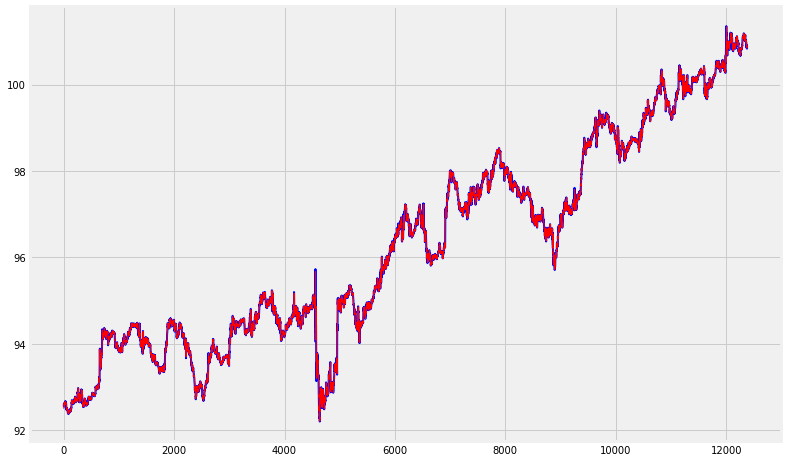

In [17]:
# Print the Mean squared error. 
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# Print Root mean squared error.
print('Test RMSE: %.3f' % math.sqrt(error))
plt.figure(figsize=(12,8))
plt.plot(test, color='blue', linewidth=2)
plt.plot(predictions, color='red', linewidth=1)
plt.show()